/home/pi/miniconda3/envs/rl-gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_64_hidden_128/tensorboard_train/events.out.tfevents.1525100489.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_256_hidden_128/tensorboard_train/events.out.tfevents.1525121929.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_64_hidden_256/tensorboard_train/events.out.tfevents.1524930896.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_256_hidden_256/tensorboard_train/events.out.tfevents.1525116007.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_64_hidden_512/tensorboard_train/events.out.tfevents.1525093452.pi-ubt
INFO:tensorflow:No path found after ./FetchReach-v1_DDPG_HER_batch_256_hidden_512/tensorboard_train/events.out.tfevents.1525118749.pi-ubt


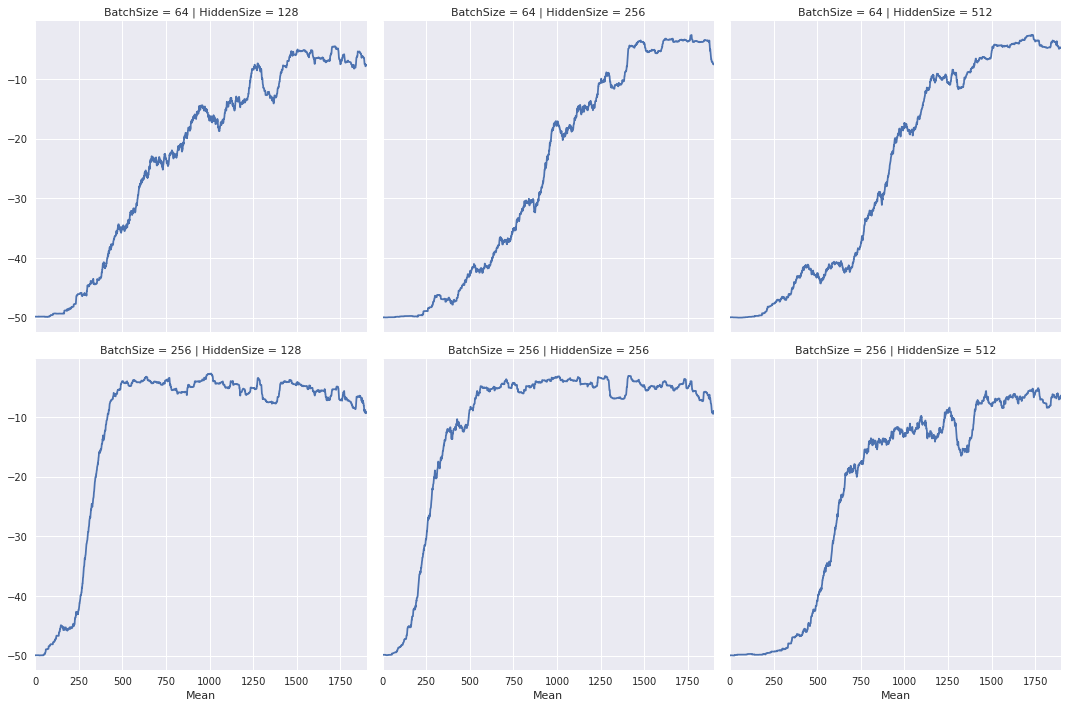

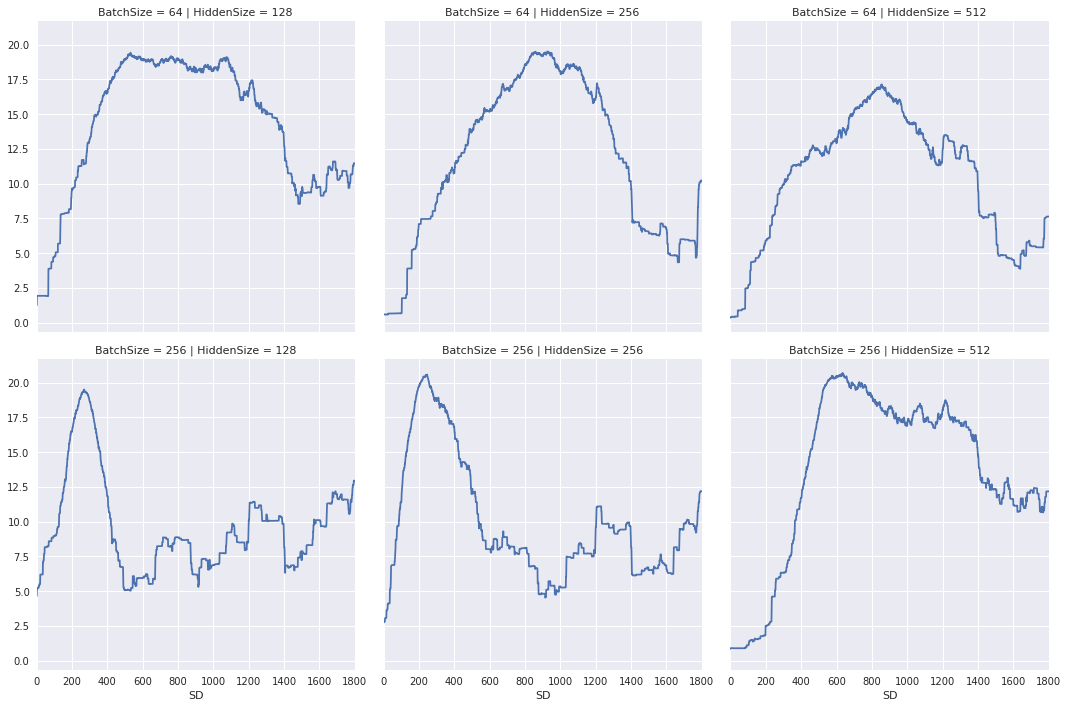

In [1]:
%matplotlib inline
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# function to open log and get reward
def getReward(log_dir):
    ea = event_accumulator.EventAccumulator(log_dir)
    ea.Reload()
    series = ea.scalars.Items('Reward')
    rewards = [s.value for s in series]
    df = pd.DataFrame(rewards, columns=['Reward'])
    df['Mean'] = df['Reward'].rolling(window=100).mean()
    df['SD'] = df['Reward'].rolling(window=200).std()
    return df

l_ = []
for i in [128, 256, 512]:
    for j in [64, 256]:
        try:
            log_dir = './FetchReach-v1_DDPG_HER_batch_' + str(j) + '_hidden_' + str(i) + '/tensorboard_train'
            df = getReward(log_dir)
            df['HiddenSize'] = i
            df['BatchSize'] = j
            l_.append(df)
        except:
            continue
df = pd.concat(l_, ignore_index=True)
    
# plot
sns.set(rc={'figure.figsize':(12, 12)})
g = sns.FacetGrid(df, col="HiddenSize", row="BatchSize", size=5)
g = g.map(sns.tsplot, "Mean")
plt.show()

# plot
sns.set(rc={'figure.figsize':(12, 12)})
g = sns.FacetGrid(df, col="HiddenSize", row="BatchSize", size=5)
g = g.map(sns.tsplot, "SD")
plt.show()